In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [2]:
def predict_steering_angle(image_path, model):
    img = Image.open(image_path)
    img = img.resize((200, 66))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=0)[0][0]
    return prediction

In [3]:

def get_actual_angle(image_number, data_file="data.txt"):
    with open(data_file, 'r') as f:
        for line in f:
            img_name, angle = line.strip().split()
            if img_name == f"{image_number}.jpg":
                return float(angle)
    return None

In [4]:

# Load the model
model = tf.keras.models.load_model('steering_model.keras')

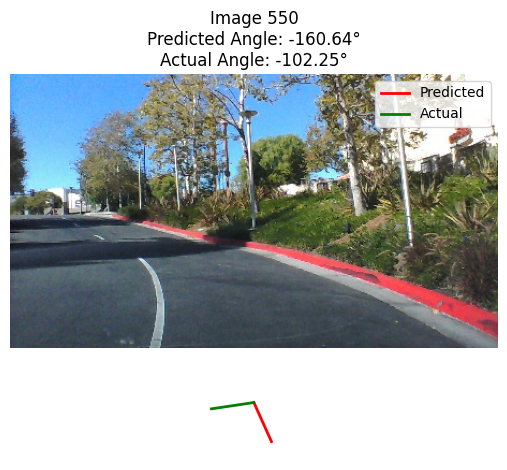

In [5]:

# Create figure
plt.figure(figsize=(12, 8))

# Process 1000 images
for i in range(1, 551):
    try:
        # Clear previous output
        clear_output(wait=True)
        
        # Load and process image
        image_path = f"driving_dataset/{i}.jpg"
        img = Image.open(image_path)
        
        # Get predictions and actual angle
        predicted_angle = predict_steering_angle(image_path, model)
        actual_angle = get_actual_angle(i)
        
        # Display image with angles
        plt.clf()
        plt.imshow(img)
        plt.title(f"Image {i}\nPredicted Angle: {predicted_angle:.2f}°\nActual Angle: {actual_angle:.2f}°")
        plt.axis('off')
        
        # Add steering wheel visualization
        wheel_center = (img.size[0]//2, img.size[1] + 50)
        wheel_radius = 50
        arrow_length = wheel_radius * 0.8
        
        # Draw predicted angle in red
        pred_x = wheel_center[0] + arrow_length * np.sin(predicted_angle)
        pred_y = wheel_center[1] - arrow_length * np.cos(predicted_angle)
        plt.plot([wheel_center[0], pred_x], [wheel_center[1], pred_y], 'r-', linewidth=2, label='Predicted')
        
        # Draw actual angle in green
        actual_x = wheel_center[0] + arrow_length * np.sin(actual_angle)
        actual_y = wheel_center[1] - arrow_length * np.cos(actual_angle)
        plt.plot([wheel_center[0], actual_x], [wheel_center[1], actual_y], 'g-', linewidth=2, label='Actual')
        
        plt.legend()
        plt.tight_layout()
        plt.pause(0.1)  # Pause to create animation effect
        
    except Exception as e:
        print(f"Error processing image {i}: {str(e)}")
        continue

plt.close()
